In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class convex_hull():
    
    def __init__(self, dataset, delta):
        self.data = dataset           # shape N x dim
        self.hull_pts = []            # initialized as an empty list
        self.delta = delta            # del theta = 1 degree
        
        
    def compute_convex_hull(self):         # O(nh)
        
        highest_pt = self.data[list(self.data[:,1]).index(np.max(self.data[:,1])), :]
        # append this first highest pt to the list of points in the convex hull
        self.hull_pts.append(highest_pt)
        next_highest = highest_pt
        
        count = 0
        cumulative_theta = 0                     # cumulative rotation angle of the whole figure!
        
        # non_hull_mask = non_hull_mask * ((dataset[:,0] != highest_pt[0]) + (dataset[:,1] != highest_pt[1]))
        not_hull_mask = (np.ones(len(self.data)) == 1) 
        not_hull_mask *= ((self.data[:,0] != highest_pt[0]) + (self.data[:,1] != highest_pt[1]))
        
        # Initial rotation matrix is initialized to the identity matrix! (Zero rotation)
        R = np.array([[1, 0], 
                      [0, 1]])
        
        while cumulative_theta < 2*np.pi:               # stops when cum_theta == 2pi
            
            count = 0                            # initializing the count variable to 0
            val = False
            
            while val == False:
                
                # 1. Rotate points by a fixed amount
                rotated_pts = self.data @ R
                
                # 2. New max Y value
                maxY = np.max(rotated_pts[:,1])                
                
                # 3. Calculate new highest point using this highest Y coordinate value
                next_highest = rotated_pts[list(rotated_pts[:,1]).index(maxY), :]
                
                # 4. Inverse rotate the highest point to check if it is still equivalent to the unrotated highest pt
                R_inv = np.array([[np.cos(cum_theta+count*self.delta), -np.sin(cum_theta+count*self.delta)],
                                  [np.sin(cum_theta+count*self.delta),  np.cos(cum_theta+count*self.delta)]])
                next_highest = next_highest @ R_inv
                
                # 5. Increase the argument of the R matrix by one more self.del increment and try again
                count += 1
                R = np.array([[ np.cos(cum_theta+count*self.delta), np.sin(cum_theta+count*self.delta)],
                              [-np.sin(cum_theta+count*self.delta), np.cos(cum_theta+count*self.delta)]])
                
                # 6. Comparing next_highest and the highest_pt
                n_h = np.array([round(next_highest[0], 5), round(next_highest[1], 5)])
                h_p = np.array([round(highest_pt[0], 5), round(highest_pt[1], 5)])
                diff = n_h - h_p
                val = diff.any()
                
            # Having exited the while loop, we have the next_highest pt and the theta rotated by so far
            # 7. update the cumulative rotation angle
            cumulative_theta += count*self.delta
            
            # 8. Append the next pt to the list of hull_pts
            highest_pt = next_highest
            if ((abs(highest_pt[0]-self.hull_pts[0][0])<10**(-8)) and (abs(highest_pt[1]-self.hull_pts[0][1])<10**(-8))):
                break                                         # BREAK from the outer while loop
            else:
                self.hull_pts.append(highest_pt)              # appending the new highest pt to the list
                # 9. Updating the not_hull_mask!   {if the difference is really really small}
                mask1 = (abs(self.data[:,0]-next_highest[0]) > 10**(-10))
                mask2 = (abs(self.data[:,1]-next_highest[1]) > 10**(-10))
                not_hull_mask = not_hull_mask * (mask1 + mask2)
        
        self.not_hull = [self.data[i] for i in range(len(self.data)) if not_hull_mask[i] == True]
        
    
    
    def plot_convex_hull(self):
        
        print('Number of data points: ', len(self.data))
        print('Number of hull points: ', len(self.hull_pts))
        print('Number of non-hull points: {}  ({} - {} = {})'.format(len(self.not_hull), len(self.data), len(self.hull_pts), len(self.data)-len(self.hull_pts)))
        
        # Appending the first point to the end to obtain a closed shape when plotting the outer hull!
        self.hull_pts.append(self.hull_pts[0])
        
        # Converting both hull pts and non hull pts into np arrays
        self.hull_pts = np.asarray(self.hull_pts).reshape(len(self.hull_pts), 2)
        self.not_hull = np.asarray(self.not_hull).reshape(len(self.not_hull), 2)
        
        # Plotting the outer hull shape!
        plt.figure(figsize=(8,8))
        plt.plot(self.hull_pts[:,0], self.hull_pts[:,1], 'k', linewidth=1.75)
        
        # Plotting the hull data points
        plt.scatter(self.hull_pts[:-1,0], self.hull_pts[:-1,1], s=50, c='b')
        # Plotting the NON hull data points
        plt.scatter(self.not_hull[:,0], self.not_hull[:,1], s=30, c='r', marker='x')
        
        plt.title('Convex hull of the given set of points')
        plt.show()

shape of data:  (135, 2)


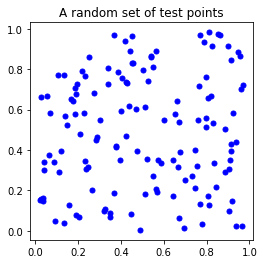

Number of data points:  135
Number of hull points:  13
Number of non-hull points: 122  (135 - 13 = 122)


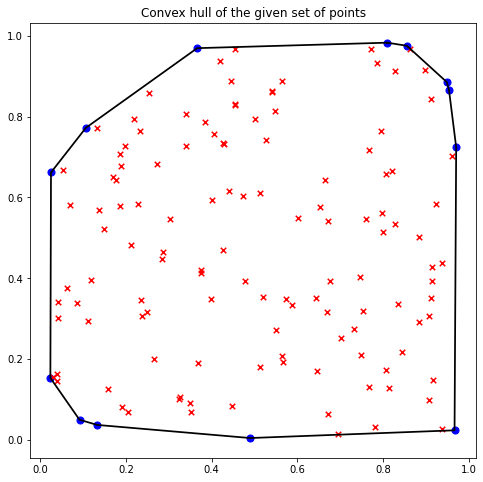

In [3]:
# Creating a random dataset to test the function on!
data = np.random.rand(135, 2)

# Testing with uniformly gridded data!
# x, y = np.meshgrid(np.arange(-0.3, 0.3, 0.1), np.arange(-0.3, 0.3, 0.1))
# x = x.reshape(-1);    y = y.reshape(-1)
# data = np.vstack((x, y)).T

print('shape of data: ', data.shape)
    
# Plotting the random points
plt.figure(figsize=(4,4))
plt.title('A random set of test points')
plt.scatter(data[:,0], data[:,1], s=25, c='b')
plt.show()

ch = convex_hull(data, np.pi/800)

ch.compute_convex_hull()
    
ch.plot_convex_hull()